In [30]:
from math import sqrt
import numpy as np
import matplotlib.pyplot as plt

In [28]:
def onsager(z, r, tau):
    return (z/n) * np.sum(eta(r, tau) != 0)

def eta(u, T):
    return (u - T)*(u >= T) + (u + T)*(u <= -T)

n = 270
N = 1024
k = 40
s = .1  ## this will have to change later
num_iterations = 15

# create sensing matrix A
A = np.sqrt(1/n)*np.random.randn(n, N)
alpha = .2
_, Lambda, _ = np.linalg.svd(A)
L = np.max(Lambda) + 1

SNRdB = np.array([-12,-10, -5, 1, 5, 10, 20])
SNRs = (10**(SNRdB/10))*n
sigma = 1/(np.sqrt(SNRs))


In [46]:
num_iterations = 15
cnt = 0
ist_mse_snr = np.zeros(len(sigma))

for sig in sigma:
    mse = 0
    for i in range(100):
        # creating new noise
        w = sig*np.random.randn(n).reshape(-1,1)
        x = np.zeros((N, 1))
        idx_nonzero_entries = np.random.permutation(N)[0:k]
        x[idx_nonzero_entries] = 1
        y = A @ x + w

        xHt = np.zeros(x.shape)

        # IST
        for idx_iter in range(num_iterations):
            z = y - A @ xHt
            r = xHt + s * A.T @ z   ## this 's' can't stick around
            xHt = eta(r, alpha/L)
        mse += (1/N) * np.sum((x - xHt)**2)
        # find the current error
    ist_mse_snr[cnt] = (1/100) * mse
    cnt += 1
        

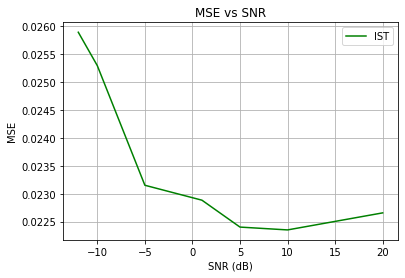

B/C I am still using 's' even though I converted to alpha/L this graph is funky


In [47]:
plt.figure()
plt.plot(SNRdB, ist_mse_snr, label="IST", color="green")
plt.title("MSE vs SNR")
plt.xlabel("SNR (dB)")
plt.ylabel("MSE")
plt.legend()
plt.grid(True, which='both')
plt.show()
print("B/C I am still using 's' even though I converted to alpha/L this graph is funky")

In [44]:
num_iterations = 15
cnt = 0
amp_mse_snr = np.zeros(len(sigma))
mse = 0

for sig in sigma:
    mse = 0
    for i in range(100):    
        # creating new noise
        w = sig*np.random.randn(n).reshape(-1,1)
        x = np.zeros((N, 1))
        idx_nonzero_entries = np.random.permutation(N)[0:k]
        x[idx_nonzero_entries] = 1
        y = A @ x + w

        # prepping for AMP
        z = np.zeros(y.shape)
        r = 0
        tau = 0
        ons = 0
        xHt = np.zeros(x.shape)

        # AMP
        for idx_iter in range(num_iterations):
            ons = onsager(z, r, tau)
            z = y - A @ xHt + ons
            tau = np.sqrt(1/n) * np.linalg.norm(z)
            r = xHt + A.T @ z
            xHt = eta(r, tau)
        mse += (1/N) * np.sum((x - xHt)**2)
    amp_mse_snr[cnt] = (1/100) * mse
    cnt += 1
    

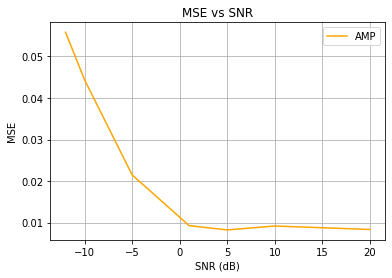

[0.05583414 0.04438029 0.02148509 0.00925903 0.00823746 0.0091816
 0.00834119]


In [45]:
plt.figure()
plt.plot(SNRdB, amp_mse_snr, label="AMP", color="orange")
plt.title("MSE vs SNR")
plt.xlabel("SNR (dB)")
plt.ylabel("MSE")
plt.legend()
plt.grid(True, which='both')
plt.show()

print(amp_mse_snr)